In this document, we will be exploring the synthetic dataset to ensure it is suitable to mimic real world patterns, and compete with real world datasets to some degree.
Then, we will proceed to train and evaluate ML models on the data.

# Exploratory Data Analysis (EDA)

## 1. Load & Inspect
## 2. Feature Distributions
## 3. Correlations
## 4. Key Bivariate Relationships
## 5. Early Insights

In [11]:
#1. Load & Inspect

#I will start by loading dependencies
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import os
import sklearn

#...
#Task: update dependencies

#Next, I will load the dataset as a pandas dataframe
df = pd.read_csv("/WDT/data/wellness_synthetic.csv")

#Checking head
print(df.head())

#Checking info
print(df.info())

   sleep_mins  sleep_qlt  steps    rhr_avg  screen_mins   water_l  stress_avg  \
0  467.763419          9   3219  66.790236   543.657309  1.150902           7   
1  422.044970          8   8041  77.218037   348.770047  2.818480           4   
2  478.633575          9  19444  53.904656   326.912522  2.905773           3   
3  541.658150          5   6287  78.151096   573.117057  1.496759           1   
4  415.140957          7   2619  69.599047   259.410016  1.768052           8   

   mood_avg  caffeine_mg  diet_qlt  prod_mins  exercise_mins  wellness_tmrw  
0         4    85.420973         2        148             78      61.536247  
1         2   106.934335         5        475             71      63.781493  
2         6   163.284541         1        226              6      78.100076  
3         9   107.721258         6        213            110      65.964726  
4         1   230.980593         2        359            118      15.695926  
<class 'pandas.core.frame.DataFrame'>
RangeIn

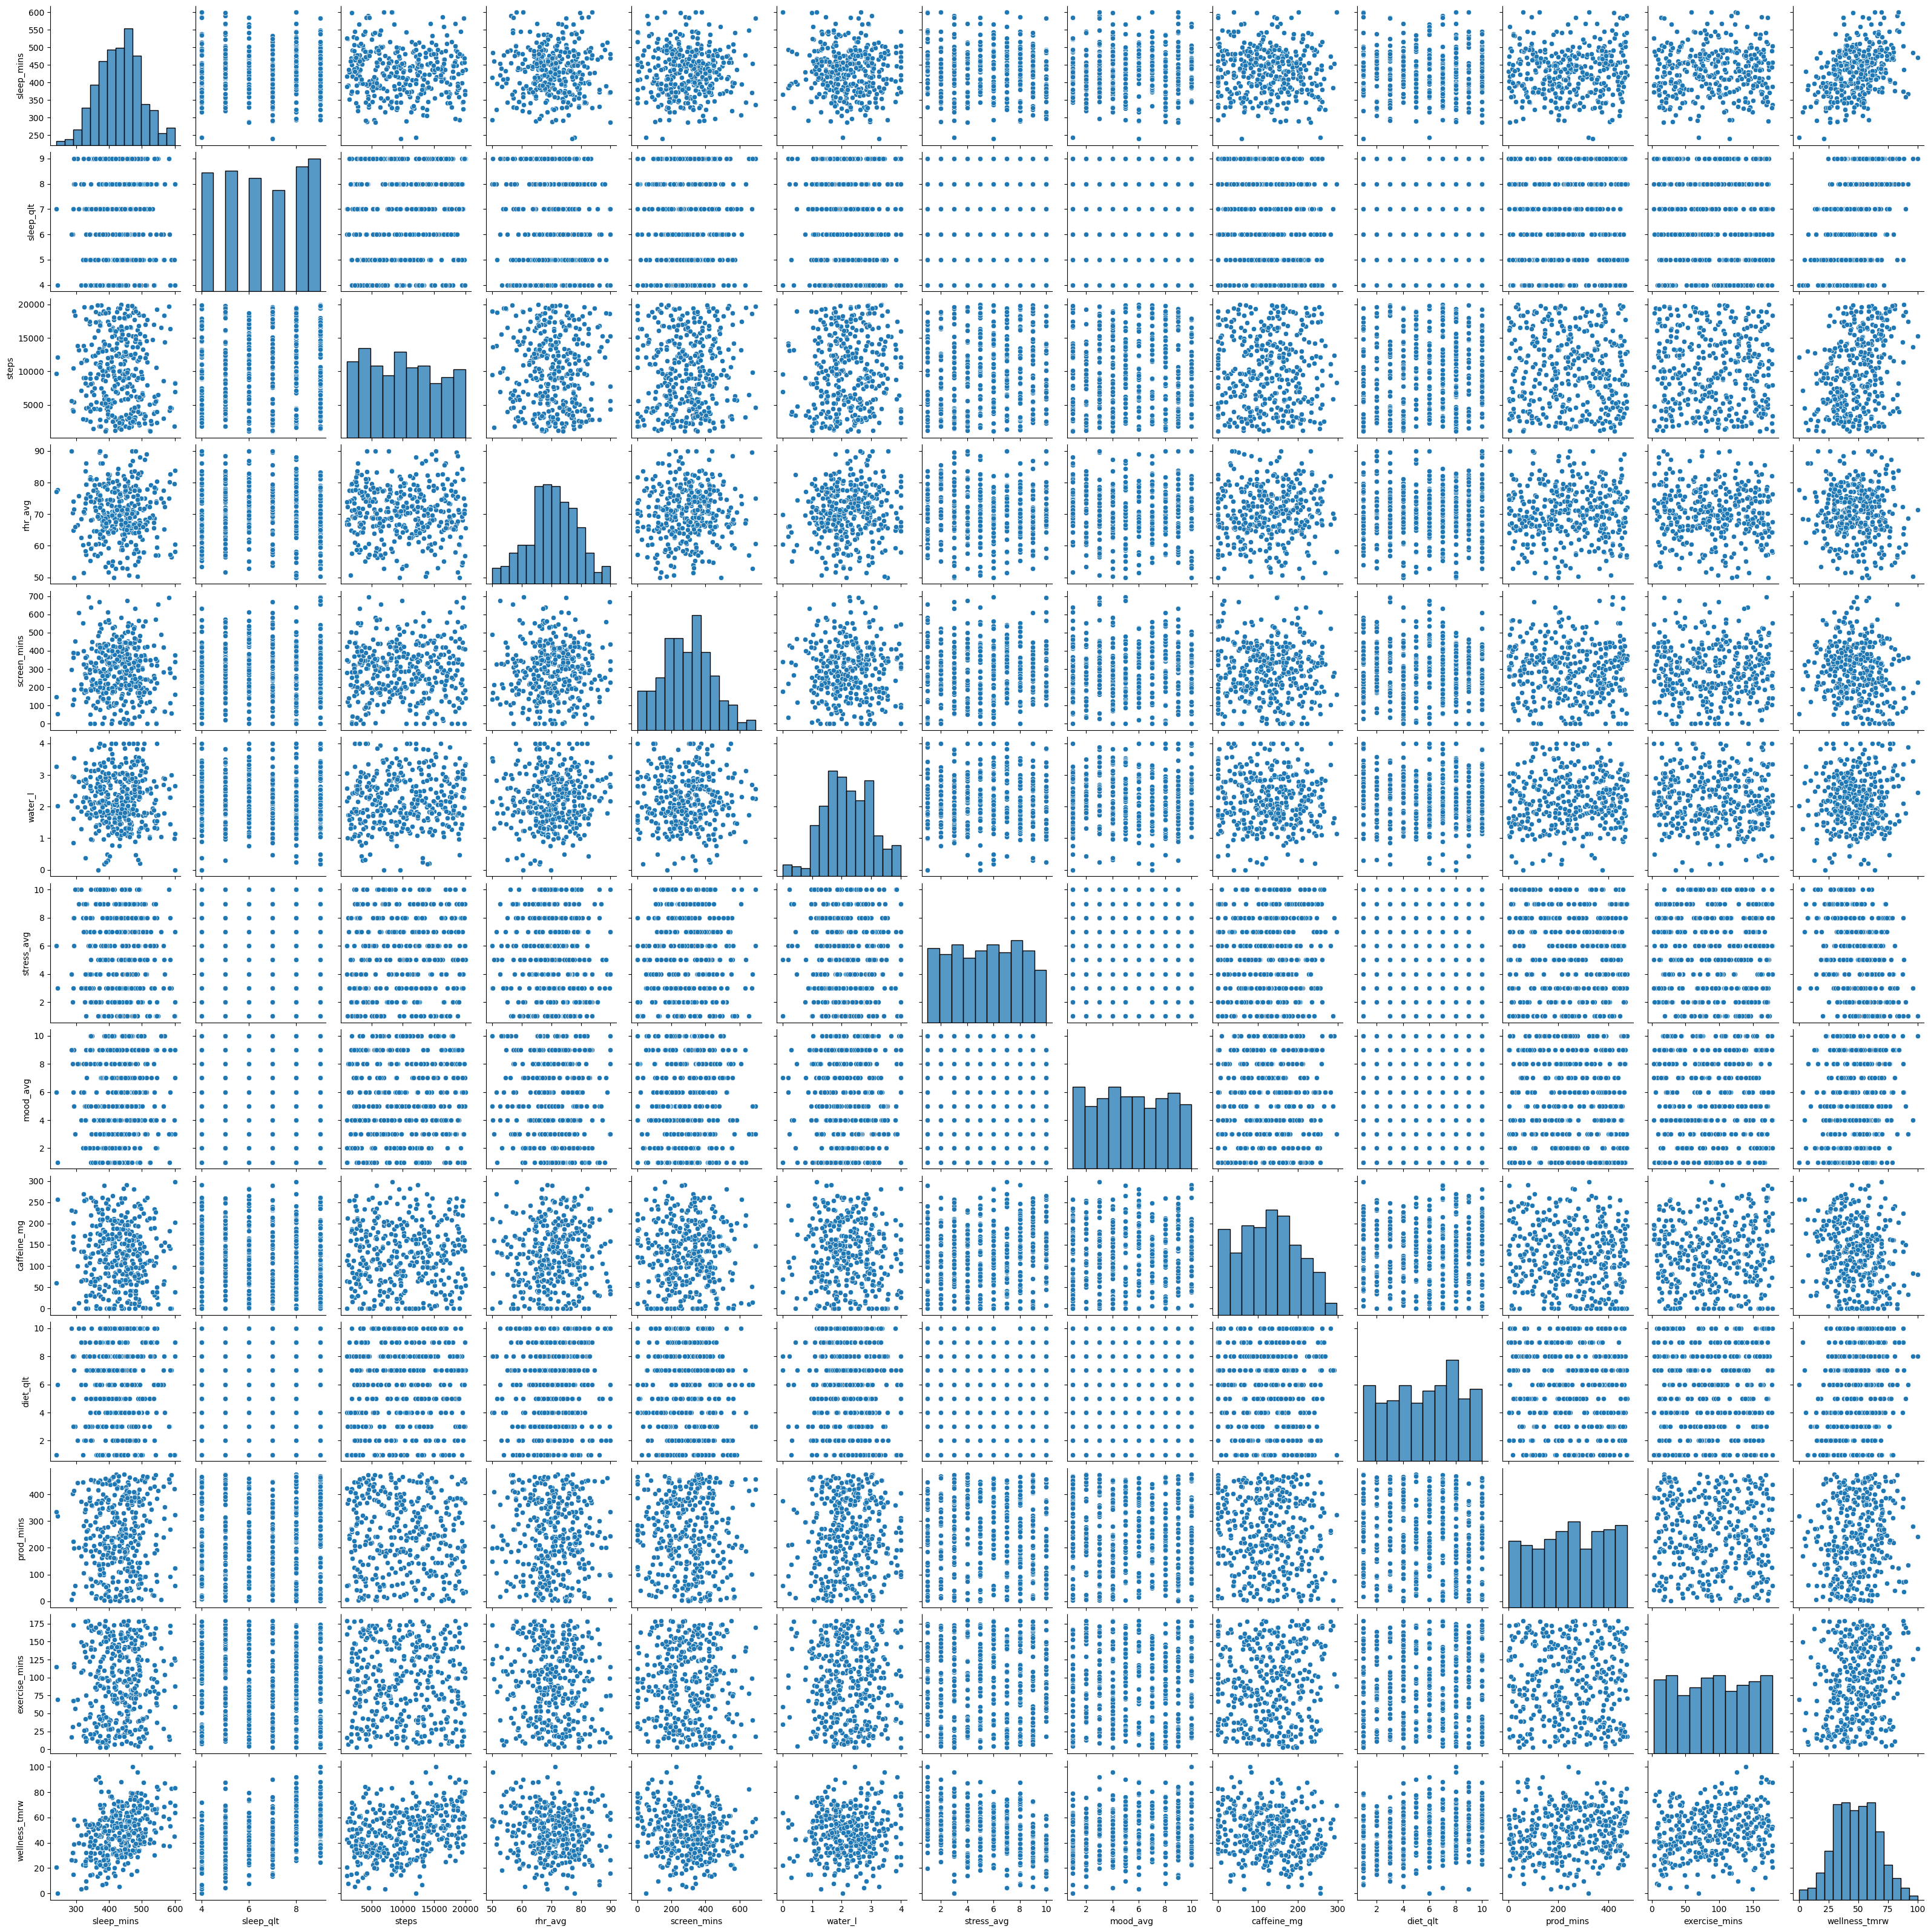

In [12]:
#Now let's do some heavy EDA
sns.pairplot(df)

<Axes: >

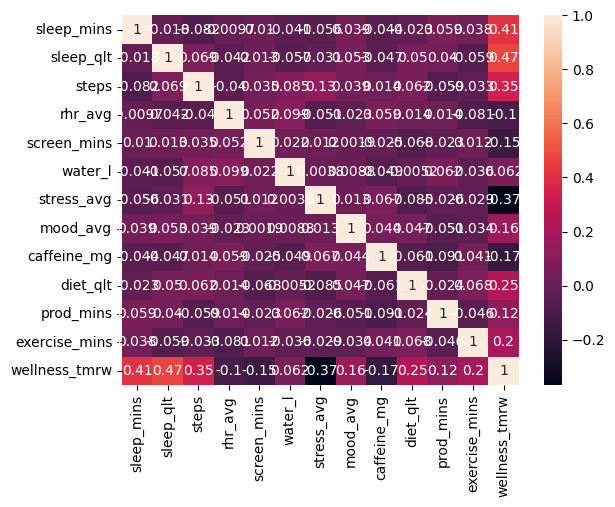

In [13]:
sns.heatmap(df.corr(), annot=True)

We can already see that some of the most impactful areas in order are: sleep qlt, sleep mins, and steps. This is on synthetic data, imagine what we can find from real and real-time applied digital twins?

# Training
## Predicting Wellness *Tomorrow*

### 1. Setup & Data Split

In [27]:
# We'll use sklearn's train test functionality
from sklearn.model_selection import train_test_split
x = df.drop("wellness_tmrw", axis = 1)
y = df["wellness_tmrw"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### 2. Baseline Model (Linear Regression)

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_preds = lr.predict(x_test)

Decent

### 3. Advanced Model (Random Forest)

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)
rf_preds = rf.predict(x_test)

### 4. Model Evaluation



In [30]:
# LR Evaluation
from sklearn.metrics import r2_score, root_mean_squared_error
print("LR R2:", r2_score(y_test, lr_preds))
print("LR RMSE:", root_mean_squared_error(y_test, lr_preds))

# RF Evaluation
from sklearn.metrics import r2_score, root_mean_squared_error
print("RF R2:", r2_score(y_test, rf_preds))
print("RF RMSE:", root_mean_squared_error(y_test, rf_preds))

LR R2: 0.835907956827652
LR RMSE: 7.629306511035813
RF R2: 0.6182319423417859
RF RMSE: 11.637001655850122


Surprisingly, the simpler model did better. We will explore why in a moment



### 5. Feature Importance & Interpretation

In [33]:
#This is taken from Random Forest trained model, put into a dictionary, sorted
feat_imp = pd.DataFrame({
    "feature": x.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

print(feat_imp)

          feature  importance
1       sleep_qlt    0.226474
0      sleep_mins    0.219436
2           steps    0.141620
6      stress_avg    0.097517
11  exercise_mins    0.067414
4     screen_mins    0.049934
8     caffeine_mg    0.048857
9        diet_qlt    0.038298
3         rhr_avg    0.034385
5         water_l    0.029443
10      prod_mins    0.026476
7        mood_avg    0.020146


As we hypothesized, sleep quality, sleep minutes and steps are the top 3 most important general wellness factors in our synthetic dataset.
Stress average, exercise minutes and screen time minutes follow.

These key insights can be found much better for each person with their digital twin.

Interpretation:

1. Linear regression outperformed Random Forest.

Linear regression captures relationship better than RandomForest, likely because the dataset was built on linear weighted formula
2. Sleep dominates the feature importance list

both sleep_quality and sleep_mins, since sleep is the firstmost important factor for general wellness

3. Steps/Exercise also matter
While this is not unexpected, people don't usually make a correlation for exercise's effects on the next day